In [1]:
from coffeegame import CoffeeGame
from pathlib import Path

In [2]:
cg = CoffeeGame(["Player 1", "Player 2", "Player 3", "Player 4", "Player 5", "Player 6", "Player 7"])

In [3]:
Path("game_example").mkdir(exist_ok=True)

In [33]:
from PIL import Image
import zbarlight

file_path = "DSC_3828.JPG"
with open(file_path, 'rb') as image_file:
    image = Image.open(image_file)
    image.load()

codes = zbarlight.scan_codes(['qrcode'], image)[0].decode('utf-8')
print(codes)

?uuid=036aa217ceec4476a7cf3d3859bc1c2f&p=5&Moritz=-8,24&Gleb=5,23&Heng=0,24&Art0m=-4,19&Art1m=11,15&Heng=-5,15&Domenico=1,12&Zaira=4,19


In [34]:
image = np.array(image)

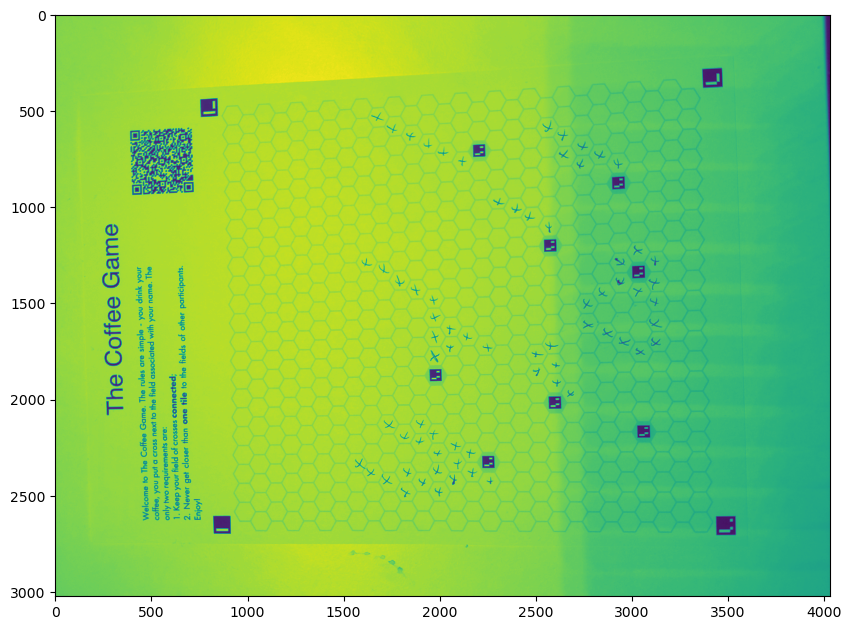

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(image.mean(axis=2))

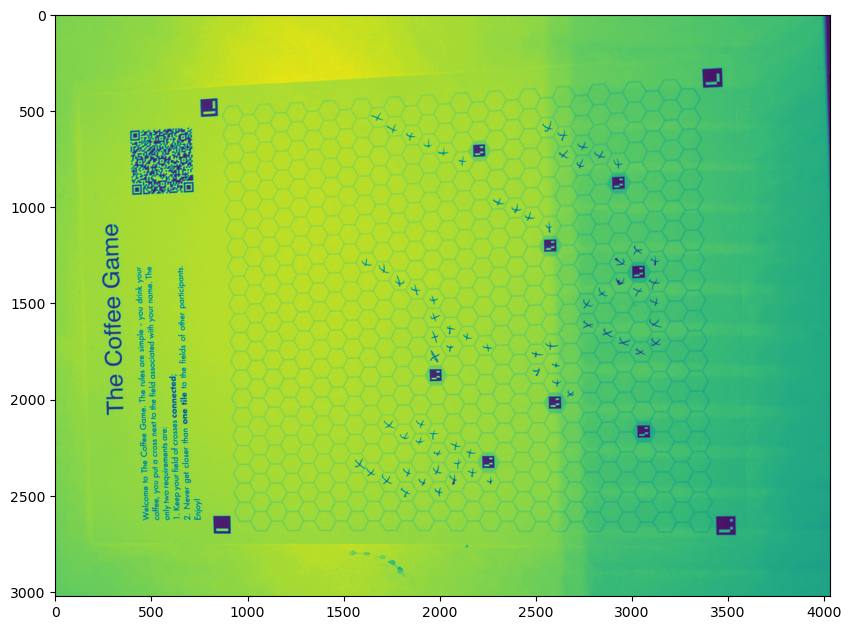

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(image.min(axis=2))

In [18]:
codes

[b'?p=5&Player 1=4,10&Player 2=3,23&Player 3=9,17&Player 4=3,3&Player 5=11,7&Player 6=0,16&Player 7=-4,24']

In [4]:
cg.generate_game_field("game_example/1.pdf")

/Users/artemshmatko/opt/miniconda3/envs/coffee/lib/python3.10/site-packages/fpdf/fpdf.py:1439: UserWarning: When providing a TTF font file you must pass uni=True to FPDF.add_font
  warnings.warn(


UnpicklingError: invalid load key, '\x00'.

In [5]:
cg_load = CoffeeGame()

In [29]:
ds = cg_load.proceed_image("DSC_3828.JPG")

ValueError: invalid literal for int() with base 10: 'id=036aa217ceec4476a7cf3d3859bc1c2f'

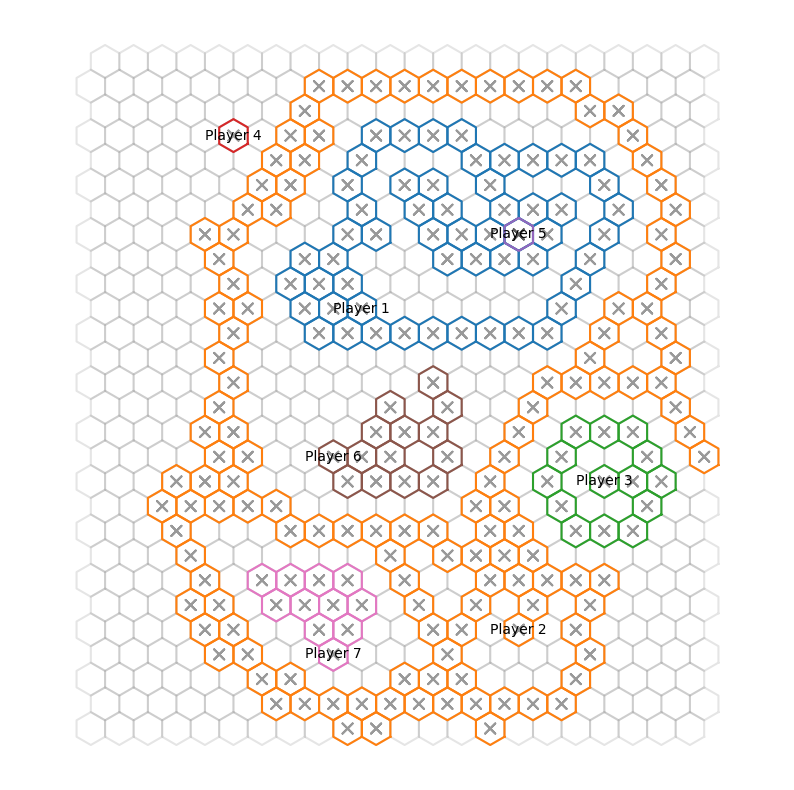

In [7]:
cg_load.draw_current_state()

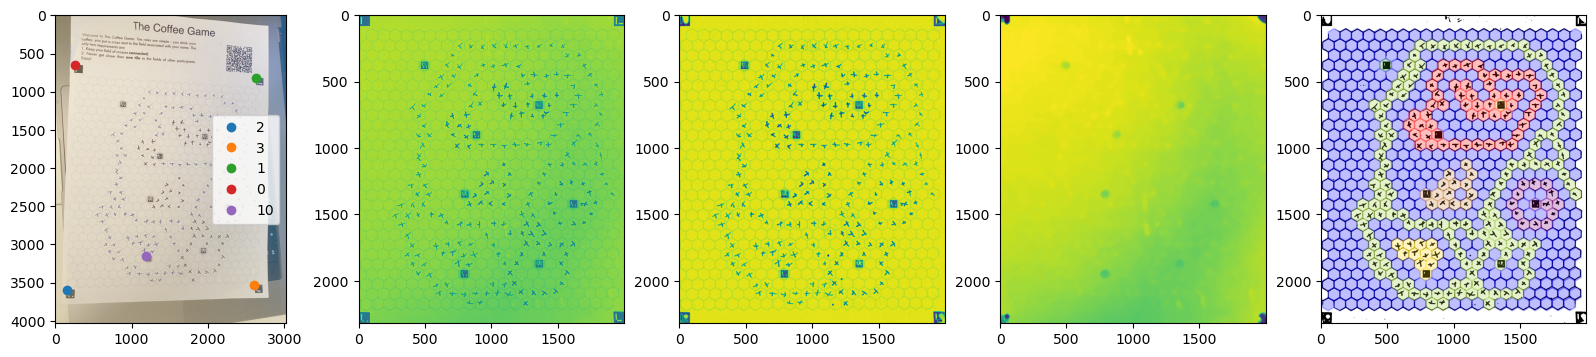

In [8]:
ds.plot_decoding_debug()

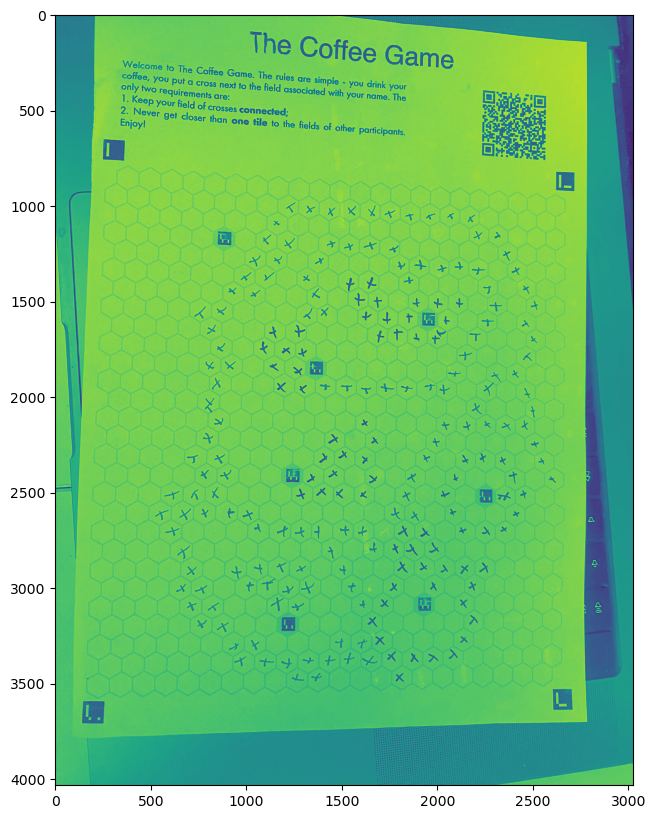

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(ds.image.min(axis=2))

In [9]:
import matplotlib.pyplot as plt
import cv2
import detection
import numpy as np

In [10]:
dst = cv2.warpPerspective(ds.crop, np.linalg.inv(ds.transform), [4000, 4000])

In [11]:
dst_pts = cv2.perspectiveTransform(np.array([ds.points], dtype=np.float32), np.linalg.inv(ds.transform))

(0.0, 3024.0, 4032.0, 0.0)

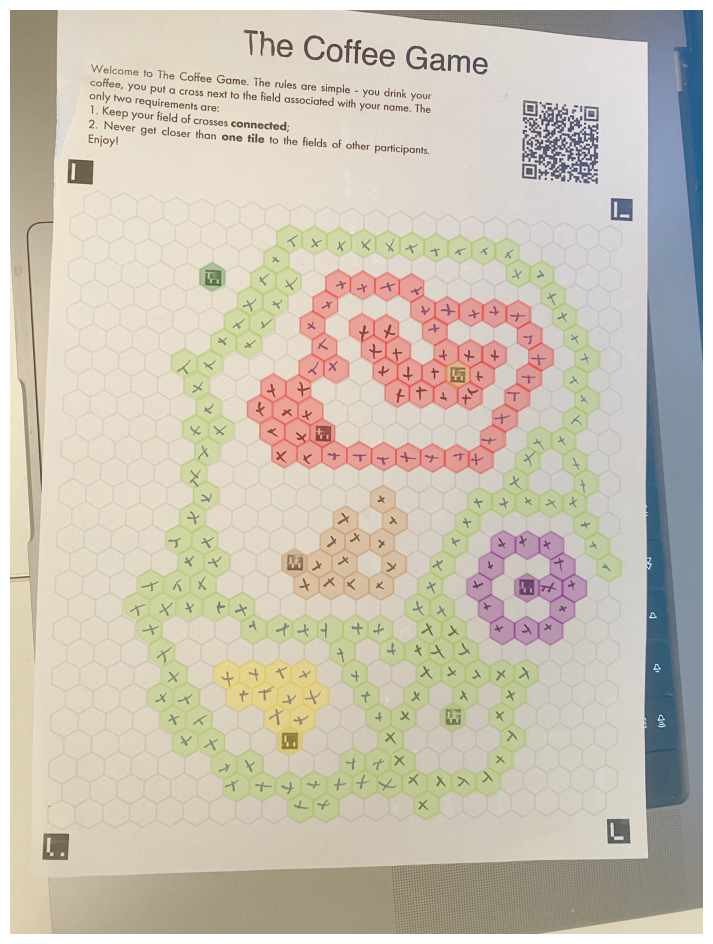

In [12]:
# plt.imshow(dst)
plt.figure(figsize=(12, 12))
detection.plot_hexes_by_class(None, dst_pts[0], ds.hexes, r=ds.r * 1.25,
                            orientation=ds.orientation, skip_empty=True, alpha=0.25)
plt.imshow(ds.image, alpha=1)
plt.xlim(0, ds.image.shape[1])
plt.ylim(0, ds.image.shape[0])

plt.gca().invert_yaxis()
plt.axis('off')

In [13]:
import cv2
image = cv2.imread("IMG_4726.jpg", 1)
detect = cv2.QRCodeDetector()
detect.detectAndDecode(image)

('', None, None)

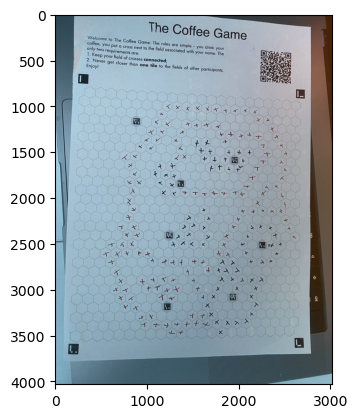

In [14]:
plt.imshow(image)

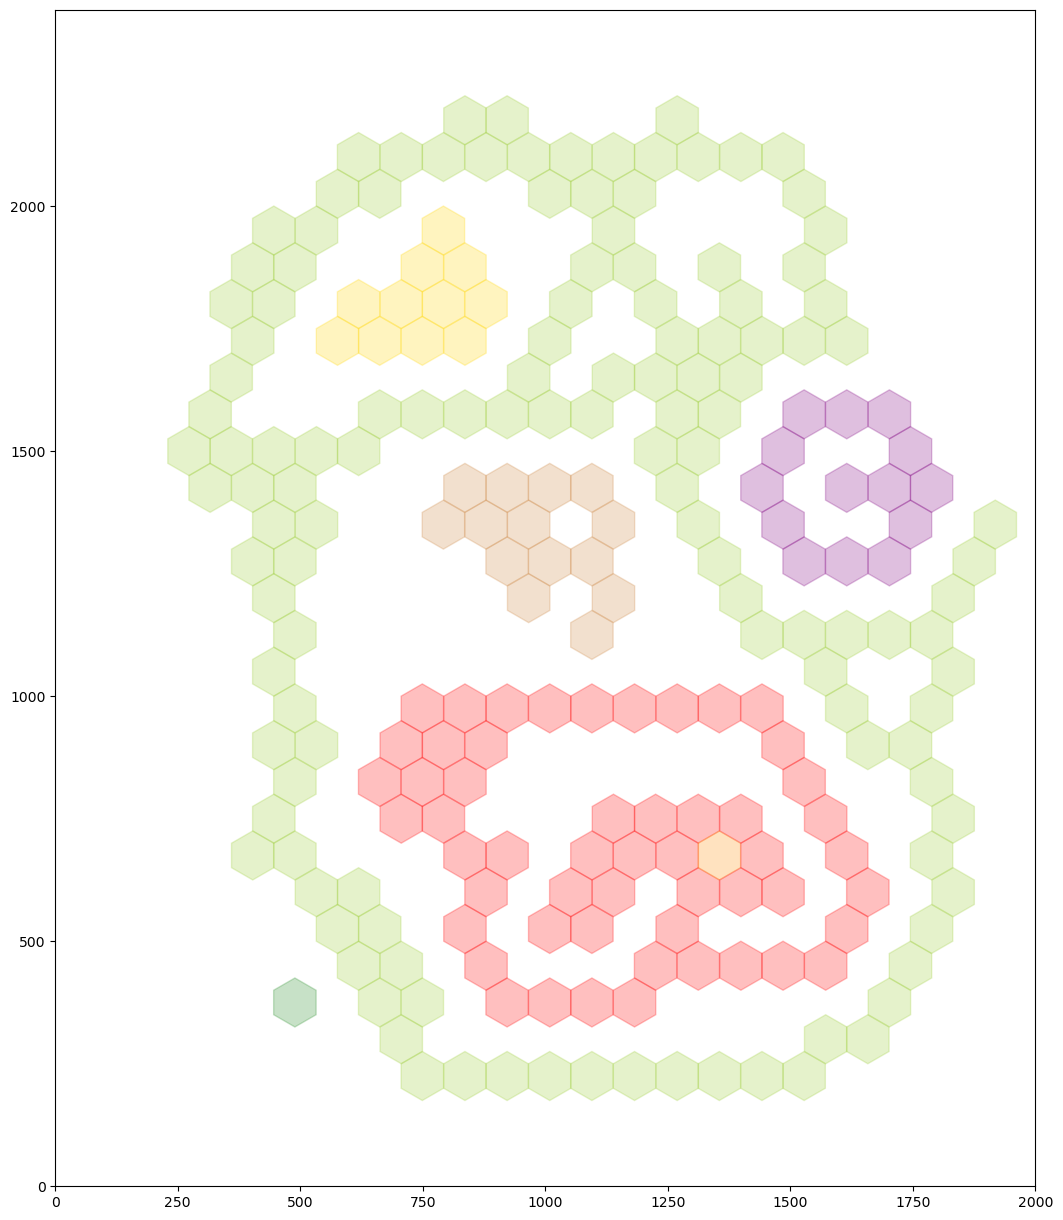

In [15]:
plt.figure(figsize=(12, 12))
ds.plot_result(binary=False, skip_empty=True, show_image=False)
plt.gcf().tight_layout(pad=0)
canvas = plt.gca().figure.canvas
canvas.draw()
data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
image = data.reshape(canvas.get_width_height()[::-1] + (3,))

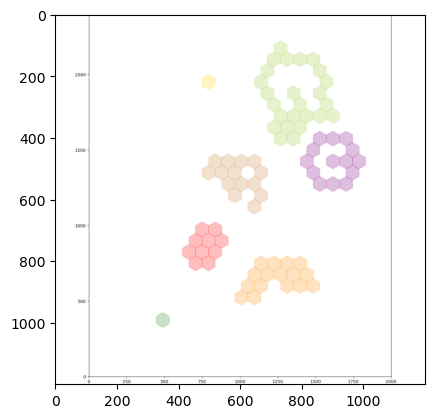

In [15]:
plt.imshow(image)

In [ ]:
dst = cv2.warpPerspective(ds.crop, np.linalg.inv(ds.transform), [4000, 4000])
plt.imshow(dst)


plt.imshow(ds.image, alpha=0.3)